# 데이터 분석 미니 프로젝트

## 요구사항 명세

* 온라인 학습 플랫폼 사용자 행동 패턴 분석
    * 유저들의 학습 습관
    * 학습 선호도
    * 이용 형태

## 데이터 형태

* 데이터셋 : mini.csv
    * 메타데이터
        * user_id: 사용자의 고유 식별자
        * subscription_duration: 사용자가 서비스에 가입한 기간 (월)
        * recent_login_time: 사용자가 마지막으로 로그인한 시간 (일)
        * average_login_time:  사용자의 일반적인 로그인 시간
        * average_time_per_learning_session: 각 학습 세션에 소요된 평균 시간 (분)
        * monthly_active_learning_days: 월간 활동적인 학습 일수
        * total_completed_courses: 완료한 총 코스 수
        * recent_learning_achievement: 최근 학습 성취도
        * abandoned_learning_sessions: 중단된 학습 세션 수
        * community_engagement_level: 커뮤니티 참여도
        * preferred_difficulty_level: 선호하는 난이도
        * subscription_type: 구독 유형
        * customer_inquiry_history: 고객 문의 이력
        * payment_pattern : 사용자의 지난 3개월 간의 결제 패턴을 10진수로 표현한 값.
          - 7: 3개월 모두 결제함
          - 6: 첫 2개월은 결제했으나 마지막 달에는 결제하지 않음
          - 5: 첫 달과 마지막 달에 결제함
          - 4: 첫 달에만 결제함
          - 3: 마지막 2개월에 결제함
          - 2: 가운데 달에만 결제함
          - 1: 마지막 달에만 결제함
          - 0: 3개월 동안 결제하지 않음
        * target: 사용자가 다음 달에도 구독을 계속할지 (1) 또는 취소할지 (0)를 나타냄

## 데이터를 보고 드는 생각

### 1) 가입 및 서비스 사용 패턴을 파악해보자
* 서비스에 가입한 기간?
* 사용자가 마지막으로 로그인한 시간(일)
* 사용자의 일반적인 로그인 시간
* 평균 학습 시간

### 2) 학습 패턴을 파악해보자
* 완료한 총 코스 수
* 최근 학습 성취도
* 중단된 학습 세션 수
* 선호하는 난이도


### 3) 기타 패턴을 파악해보자
* 커뮤니티 참여도
    * 커뮤니티 참여도와 target의 관계 (커뮤니티 활동이 높을수록 다음달 구독할 확률이 높지 않을까?)
* 구독유형
    * 구독 유형과 target의 관계 (Premium 구독자일수록 플랫폼에 더 만족한다는 뜻이 아닐까? 다음달 구독 확률이 높지 않을까?)
* 고객 문의 이력
    * 구매 문의 이력과 target의 관계 (구매 문의를 많이 한다는 것이 긍정적인 시그널일까? 부정적인 시그널일까?)
* 결제 패턴
    * 연속적으로 결제한 달이 있는 사람은 또 구독할 가능성이 높지 않을까? (target 1인 경우/0인 경우?)
    * 두 달 이상 결제한 사람이 구독할 가능성이 높지 않을까? (target 1인 경우/0인 경우?)

## 데이터 로드 및 전처리

In [141]:
import pandas as pd
all_data = pd.read_table('data/mini.csv',sep=',')

### 데이터 살펴보기

In [36]:
all_data.head(10)

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
0,b919c29d,13,14,14.946163,8.427187,18,16,68.360455,3,4,Low,Basic,4,5,0
1,a0a60abb,16,18,18.453224,72.646087,16,13,97.567322,2,3,Medium,Basic,1,6,1
2,b9f171ae,22,1,16.195228,21.774492,13,14,94.358763,3,4,Medium,Premium,0,7,1
3,5dc0ba8b,1,19,17.628656,42.659066,19,18,70.153228,0,3,Low,Basic,1,0,1
4,65c83654,4,5,21.390656,30.744287,19,10,81.917908,2,4,Medium,Basic,3,0,1
5,b7586b82,4,4,17.274007,34.034189,21,8,74.371028,2,4,High,Basic,5,7,0
6,682ca511,8,23,10.629897,116.455949,12,10,58.708390,0,2,Low,Basic,0,6,1
7,8c948022,10,20,14.751713,67.821393,10,16,88.567777,3,5,Low,Premium,1,1,1
8,9e6713d2,20,4,12.624582,37.384210,8,8,63.624395,4,4,High,Basic,0,0,1
9,0eac44aa,22,8,10.545536,18.696273,5,10,57.646992,5,4,Medium,Basic,4,7,1


In [37]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   user_id                            10000 non-null  object 
 1   subscription_duration              10000 non-null  int64  
 2   recent_login_time                  10000 non-null  int64  
 3   average_login_time                 10000 non-null  float64
 4   average_time_per_learning_session  10000 non-null  float64
 5   monthly_active_learning_days       10000 non-null  int64  
 6   total_completed_courses            10000 non-null  int64  
 7   recent_learning_achievement        10000 non-null  float64
 8   abandoned_learning_sessions        10000 non-null  int64  
 9   community_engagement_level         10000 non-null  int64  
 10  preferred_difficulty_level         10000 non-null  object 
 11  subscription_type                  10000 non-null  obje

In [38]:
all_data.describe(include='all')

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
count,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000
unique,10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN
top,b919c29d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low,Basic,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4992,5979,NaN,NaN,NaN
mean,NaN,11.897400,15.013200,14.994076,54.917720,12.545400,12.227500,75.029513,3.043600,3.886100,NaN,NaN,2.010500,3.502900,0.619900
std,NaN,6.600896,8.362573,3.001869,56.024310,6.932239,3.634125,9.968529,1.755052,1.262175,NaN,NaN,1.420983,2.311261,0.485435
min,NaN,1.000000,1.000000,2.366189,0.011515,1.000000,1.000000,35.941755,0.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000
25%,NaN,6.000000,8.000000,13.025597,15.276611,7.000000,10.000000,68.278054,2.000000,3.000000,NaN,NaN,1.000000,1.000000,0.000000
50%,NaN,12.000000,15.000000,14.979228,37.578818,13.000000,12.000000,75.126061,3.000000,4.000000,NaN,NaN,2.000000,4.000000,1.000000
75%,NaN,18.000000,22.000000,16.995340,75.584200,19.000000,15.000000,81.718976,4.000000,5.000000,NaN,NaN,3.000000,6.000000,1.000000


In [39]:
print(all_data['preferred_difficulty_level'].unique())
print(all_data['subscription_type'].unique())

['Low' 'Medium' 'High']
['Basic' 'Premium']


### 데이터 해석

* subscription_duration : 1월~12월이 아니라, 총 23개월 가입했다는 의미인듯?
* recent_login_time : 지난달 N일에 로그인
* average_login_time : 단위가 시간?
* average_time_per_learning_session : maxrk 503으로 이상치인듯! 박스플랏 그려볼 것
* monthly_active_learning_days: 1~31사이여야함 -> 그러함!
* total_completed_courses: 별 다른 이상 없어보임
* recent_learning_achievement: 학습 달성도는 1% ~ 100% 가 끝이 아닌가? 112가 있다. 박스플랏 그려볼 것!
* abandoned_learning_sessions: 별 다른 이상 없어보임
* community_engagement_level: 1~5 수준으로 나타낸듯
* preferred_difficulty_level: Low, Medium, High로 나타남 -> 0, 1, 2로 치환
* subscription_type은 Basic과 Premium -> 0, 1로 치환
* customer_inquiry_history: 별 다른 이상 없어보임
* payment_pattern : 사용자의 지난 3개월 간의 결제 패턴을 10진수로 표현한 값
* target: 어떤 기준으로 1, 0이 된건지 도저히 알 수 없음! 그냥 자동 결제 시스템 등록했으면 1인가?!

### 데이터 치환

In [123]:
all_data['preferred_difficulty_level']=all_data['preferred_difficulty_level'].replace({'Low':0,'Medium':1,'High':2})
all_data['subscription_type']=all_data['subscription_type'].replace({'Basic':0,'Premium':1})

/var/folders/5n/kjkw6sh12dx20bbd340zn1pr0000gn/T/ipykernel_28788/3165905919.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  all_data['preferred_difficulty_level']=all_data['preferred_difficulty_level'].replace({'Low':0,'Medium':1,'High':2})
/var/folders/5n/kjkw6sh12dx20bbd340zn1pr0000gn/T/ipykernel_28788/3165905919.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  all_data['subscription_type']=all_data['subscription_type'].replace({'Basic':0,'Premium':1})


In [124]:
all_data.head(10)

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
0,b919c29d,13,14,7.070982,8.427187,18,16,68.360455,3,4,0,0,4,5,0
1,a0a60abb,16,18,7.070982,72.646087,16,13,97.567322,2,3,1,0,1,6,1
2,b9f171ae,22,1,7.070982,21.774492,13,14,94.358763,3,4,1,1,0,7,1
3,5dc0ba8b,1,19,7.070982,42.659066,19,18,70.153228,0,3,0,0,1,0,1
4,65c83654,4,5,7.070982,30.744287,19,10,81.917908,2,4,1,0,3,0,1
5,b7586b82,4,4,7.070982,34.034189,21,8,74.371028,2,4,2,0,5,7,0
6,682ca511,8,23,7.070982,116.455949,12,10,58.708390,0,2,0,0,0,6,1
7,8c948022,10,20,7.070982,67.821393,10,16,88.567777,3,5,0,1,1,1,1
8,9e6713d2,20,4,7.070982,37.384210,8,8,63.624395,4,4,2,0,0,0,1
9,0eac44aa,22,8,7.070982,18.696273,5,10,57.646992,5,4,1,0,4,7,1


In [125]:
all_data.describe()

,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,11.897400,15.013200,7.065959,54.917720,12.545400,12.227500,75.029513,3.043600,3.886100,0.700800,0.402100,2.010500,3.502900,0.619900
std,6.600896,8.362573,0.108422,56.024310,6.932239,3.634125,9.968529,1.755052,1.262175,0.780859,0.490346,1.420983,2.311261,0.485435
min,1.000000,1.000000,2.366189,0.011515,1.000000,1.000000,35.941755,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,8.000000,7.070982,15.276611,7.000000,10.000000,68.278054,2.000000,3.000000,0.000000,0.000000,1.000000,1.000000,0.000000
50%,12.000000,15.000000,7.070982,37.578818,13.000000,12.000000,75.126061,3.000000,4.000000,1.000000,0.000000,2.000000,4.000000,1.000000
75%,18.000000,22.000000,7.070982,75.584200,19.000000,15.000000,81.718976,4.000000,5.000000,1.000000,1.000000,3.000000,6.000000,1.000000
max,23.000000,29.000000,7.070982,503.372616,24.000000,27.000000,112.643828,12.000000,5.000000,2.000000,1.000000,10.000000,7.000000,1.000000


## 데이터 시각화 및 분석

In [88]:
import matplotlib.pyplot as plt
import numpy as np
import koreanize_matplotlib

### 1) 가입 및 서비스 사용 패턴을 파악해보자

* 서비스에 가입한 기간?
* 사용자가 마지막으로 로그인한 시간(일)
* 사용자의 일반적인 로그인 시간

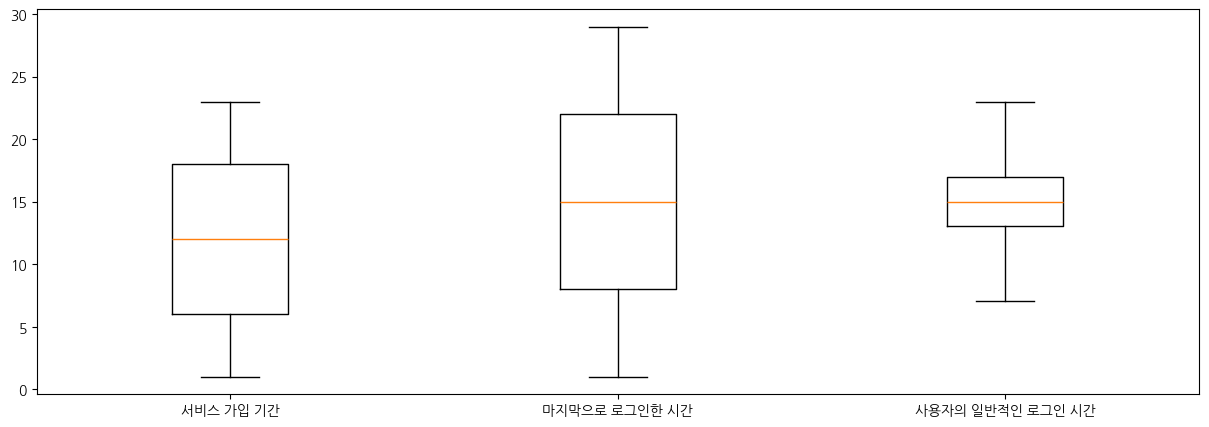

In [154]:
idx = np.arange(1, 4)
labels = ['서비스 가입 기간', '마지막으로 로그인한 시간', '사용자의 일반적인 로그인 시간']

#그래프 사이즈 변경
plt.figure(figsize=(15,5))

#그래프 x축 y축
plt.boxplot([all_data['subscription_duration'],all_data['recent_login_time'],all_data['average_login_time']],whis = 1.5)
# whis 는 이상치와 관련된 하이퍼파라미터, default = 1.5
# [Q1-whis*(Q3-Q1), Q3+whis*(Q3-Q10)]을 벗어나면 이상치로 봄!

#그래프 명
plt.xticks(idx, labels)

#그래프 출력
plt.show()

(array([ 180.,  382.,  865., 1520., 2098., 2050., 1457.,  903.,  378.,
         167.]),
 array([ 7.07098186,  8.65887924, 10.24677662, 11.83467399, 13.42257137,
        15.01046875, 16.59836613, 18.1862635 , 19.77416088, 21.36205826,
        22.94995564]),
 <BarContainer object of 10 artists>)

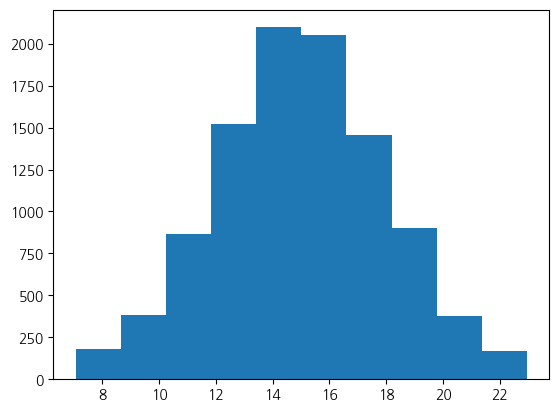

In [155]:
plt.hist(all_data['average_login_time'])

In [183]:
# IQR 기준 이상치 개수 확인
def findOutliers(x,column):
    q1 = x[column].quantile(0.25)
    q3 = x[column].quantile(0.75)
    iqr = q3 - q1
    Max = q3 + 1.5*iqr
    Min = q1 - 1.5*iqr
    if Min<0 : Min = 0
    y = x[(x[column] > Max) | (x[column] < Min)]
    print("IQR outliers: ",len(y))
    print("max : ", Max)
    print("min : ", Min)
    return len(y), Max, Min

In [168]:
# IQR 기준 이상치 개수 확인
y, Max_alt, Min_alt = findOutliers(all_data,'average_login_time')

일반적인 로그인 시간 IQR outliers:  0
max :  22.949955636222207
min :  7.070981860296825


In [169]:
print("Over Max : ", all_data['average_login_time'][32])
print("Over Min : ", all_data['average_login_time'][1968])

Over Max :  22.949955636222207
Over Min :  7.070981860296825


*INSIGHT*  

* 서비스 가입 기간과 마지막으로 로그인한 시간은 이상치 데이터가 없다.
* 사용자의 일반적인 로그인 시간은 너무 짧거나 너무 긴 경우가 있다. (90개)
    * 잘 못 로그인 했거나
    * 로그인하고 깜빡 했거나
    -> Q1보다 작으면 Q1, Q3보다 크면 Q3 값으로 대체

In [170]:
def editOutliers(x,column,Min,Max):
    x.loc[(x[column]>Max),column] = Max
    x.loc[(x[column]<Min),column] = Min

In [171]:
editOutliers(all_data,'average_login_time', Min_alt,Max_alt)

In [172]:
print("Over Max : ", all_data['average_login_time'][32])
print("Over Min : ", all_data['average_login_time'][1968])

Over Max :  22.949955636222207
Over Min :  7.070981860296825


{'whiskers': [<matplotlib.lines.Line2D at 0x30ce8e0a0>,
 'caps': [<matplotlib.lines.Line2D at 0x30ce8e5e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x30ce7eee0>],
 'medians': [<matplotlib.lines.Line2D at 0x30ce8eb20>],
 'fliers': [<matplotlib.lines.Line2D at 0x30ce8edc0>],
 'means': []}

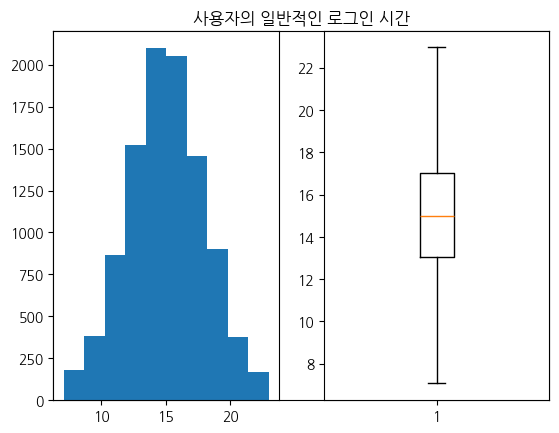

In [178]:
plt.title('사용자의 일반적인 로그인 시간')
plt.tick_params(left = False, right = False , labelleft = False , 
                labelbottom = False, bottom = False) 

plt.subplot(1,2,1)
plt.hist(all_data['average_login_time'])

plt.subplot(1,2,2)
plt.boxplot(all_data['average_login_time'],whis = 1.5)

* 평균 학습 시간

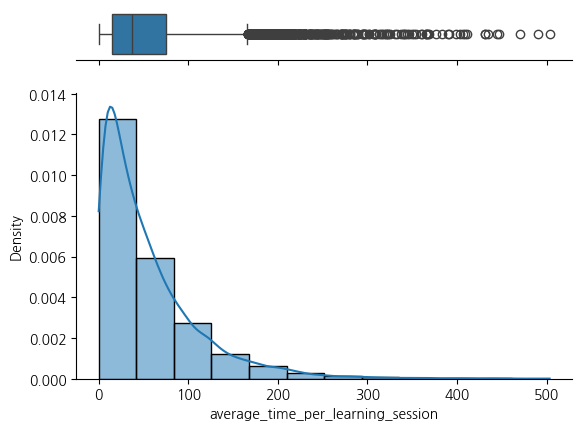

In [165]:
import seaborn as sns

x = all_data['average_time_per_learning_session']
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(x=x, ax=ax_box)
sns.histplot(x=x, bins=12, kde=True, stat='density', ax=ax_hist)

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

In [173]:
# IQR 기준 이상치 개수 확인
y, Max_atpls, Min_atpls = findOutliers(all_data,'average_time_per_learning_session')

일반적인 로그인 시간 IQR outliers:  512
max :  166.04558435741137
min :  0


In [174]:
editOutliers(all_data,'average_time_per_learning_session', Min_atpls,Max_atpls)

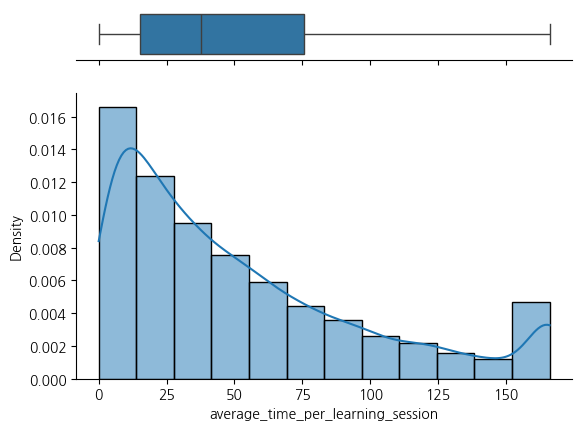

In [175]:
import seaborn as sns

x = all_data['average_time_per_learning_session']
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(x=x, ax=ax_box)
sns.histplot(x=x, bins=12, kde=True, stat='density', ax=ax_hist)

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

*INSIGHT*  
* 일반적인 로그인 시간의 이상치 변경 방법으로 했더니 max값이 너무 커져서 원래 분포의 모양이 사라짐

### 2) 학습 패턴을 파악해보자

* 완료한 총 코스 수

{'whiskers': [<matplotlib.lines.Line2D at 0x30aeec2b0>,
 'caps': [<matplotlib.lines.Line2D at 0x30b099df0>,
 'boxes': [<matplotlib.lines.Line2D at 0x30aeec820>],
 'medians': [<matplotlib.lines.Line2D at 0x308d63e50>],
 'fliers': [<matplotlib.lines.Line2D at 0x309c51190>],
 'means': []}

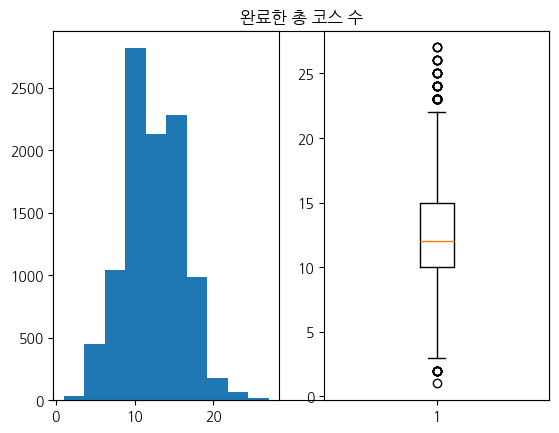

In [182]:
plt.title('완료한 총 코스 수')
plt.tick_params(left = False, right = False , labelleft = False , 
                labelbottom = False, bottom = False) 

plt.subplot(1,2,1)
plt.hist(all_data['total_completed_courses'])

plt.subplot(1,2,2)
plt.boxplot(all_data['total_completed_courses'],whis = 1.5)

In [184]:
# IQR 기준 이상치 개수 확인
y, Max_atpls, Min_atpls = findOutliers(all_data,'total_completed_courses')

IQR outliers:  65
max :  22.5
min :  2.5


*INSIGHT*
  
아웃라이어가 있긴 하지만, 열혈 수강생일 수 있기에 무시할 수 없음!

* 최근 학습 성취도

{'whiskers': [<matplotlib.lines.Line2D at 0x30cd10370>,
 'caps': [<matplotlib.lines.Line2D at 0x30cd108b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x30cd101f0>],
 'medians': [<matplotlib.lines.Line2D at 0x30cd10df0>],
 'fliers': [<matplotlib.lines.Line2D at 0x30ccdc0d0>],
 'means': []}

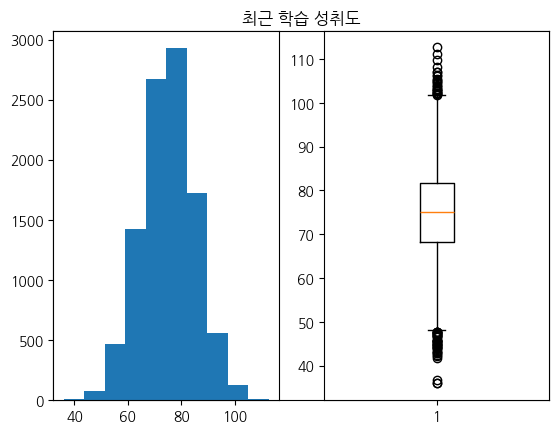

In [185]:
plt.title('최근 학습 성취도')
plt.tick_params(left = False, right = False , labelleft = False , 
                labelbottom = False, bottom = False) 

plt.subplot(1,2,1)
plt.hist(all_data['recent_learning_achievement'])

plt.subplot(1,2,2)
plt.boxplot(all_data['recent_learning_achievement'],whis = 1.5)

In [186]:
# IQR 기준 이상치 개수 확인
y, Max_atpls, Min_atpls = findOutliers(all_data,'recent_learning_achievement')

IQR outliers:  67
max :  101.88035723082587
min :  48.116672703278


*INSIGHT*
  
[성취도 = 수강 완료한 코스 수 / 수강 시작한 코스 수] 라고 생각  
100이 넘으면 안될 것이라 판단 -> 100 이상인 것은 모두 100으로 치환

In [187]:
all_data.loc[(all_data['recent_learning_achievement']>100),'recent_learning_achievement'] = 100

{'whiskers': [<matplotlib.lines.Line2D at 0x30cfef910>,
 'caps': [<matplotlib.lines.Line2D at 0x30cfefd30>,
 'boxes': [<matplotlib.lines.Line2D at 0x30cfef670>],
 'medians': [<matplotlib.lines.Line2D at 0x30cffd2b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x30cffd550>],
 'means': []}

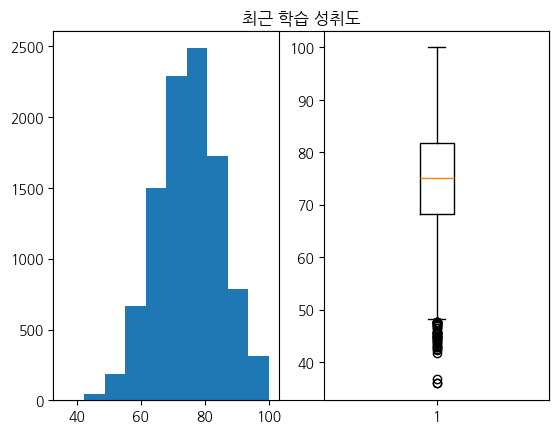

In [188]:
plt.title('최근 학습 성취도')
plt.tick_params(left = False, right = False , labelleft = False , 
                labelbottom = False, bottom = False) 

plt.subplot(1,2,1)
plt.hist(all_data['recent_learning_achievement'])

plt.subplot(1,2,2)
plt.boxplot(all_data['recent_learning_achievement'],whis = 1.5)

* 중단된 학습 세션 수

{'whiskers': [<matplotlib.lines.Line2D at 0x30d126be0>,
 'caps': [<matplotlib.lines.Line2D at 0x30d1340d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x30d126940>],
 'medians': [<matplotlib.lines.Line2D at 0x30d134610>],
 'fliers': [<matplotlib.lines.Line2D at 0x30d1348b0>],
 'means': []}

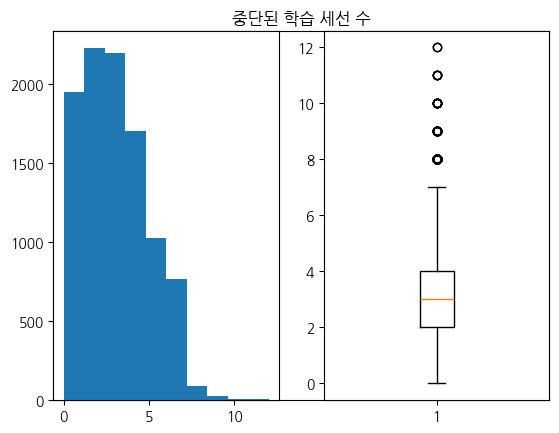

In [189]:
plt.title('중단된 학습 세선 수')
plt.tick_params(left = False, right = False , labelleft = False , 
                labelbottom = False, bottom = False) 

plt.subplot(1,2,1)
plt.hist(all_data['abandoned_learning_sessions'])

plt.subplot(1,2,2)
plt.boxplot(all_data['abandoned_learning_sessions'],whis = 1.5)

*INSIGHT*  
별 특이사항 없음.. 대부분 시작하면 잘 듣는 것으로 보임  
다양한 강의 오리엔테이션만 듣고 안 듣는 경우 Outlier가 될 것 같음, 무시할 필요 없다 생각

* 선호하는 난이도

(array([4992.,    0.,    0.,    0.,    0., 3008.,    0.,    0.,    0.,
        2000.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

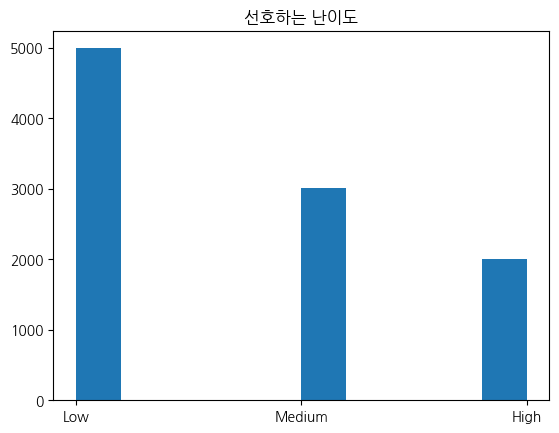

In [193]:
plt.title('선호하는 난이도')
plt.hist(all_data['preferred_difficulty_level'])

*INSIGHT*  
쉬운걸 선호하는것은 당연하다 생각 ㅎㅎ

* 선호하는 학습 난이도에 따른 평균 학습 완료 수

In [207]:
# group by
all_data.groupby('preferred_difficulty_level')[['total_completed_courses']].mean()
# group by에 [] 찍어주면 DF로 뽑을 수 있음!

,total_completed_courses
preferred_difficulty_level,
High,11.202000
Low,13.271434
Medium,11.176862


평균적으로는 큰 차이가 없음!

### 3) 기타 패턴을 파악해보자

* 커뮤니티 참여도

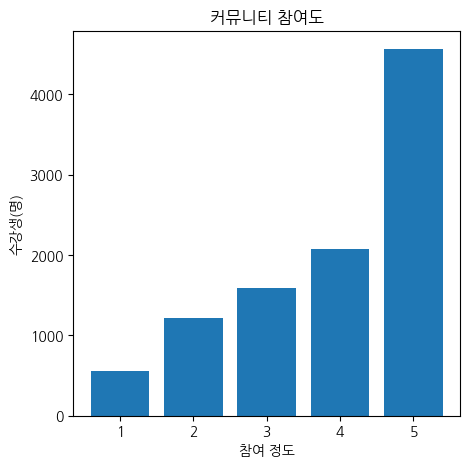

In [247]:
df2  = all_data.groupby('community_engagement_level').count()

plt.figure(figsize=(5,5))
plt.bar(df2.index, df2['user_id'])

plt.title('커뮤니티 참여도')
plt.xlabel('참여 정도')
plt.ylabel('수강생(명)')
plt.xticks()
plt.show()

* 구독유형

(array([5979.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        4021.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

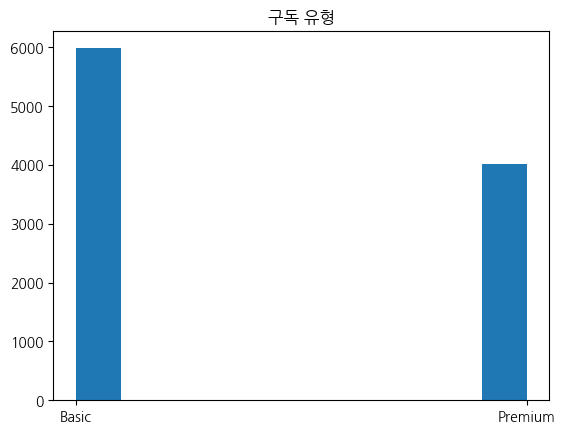

In [214]:
plt.title('구독 유형')
plt.hist(all_data['subscription_type'])

* 고객 문의 이력

{'whiskers': [<matplotlib.lines.Line2D at 0x30d35ffa0>,
 'caps': [<matplotlib.lines.Line2D at 0x30d35fca0>,
 'boxes': [<matplotlib.lines.Line2D at 0x30d35ca90>],
 'medians': [<matplotlib.lines.Line2D at 0x30d35f7c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x30d35f4f0>],
 'means': []}

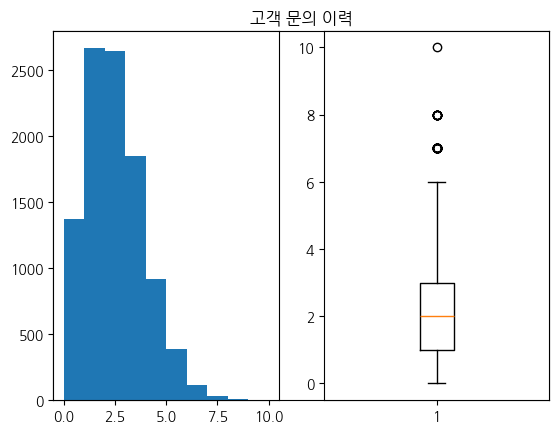

In [210]:
plt.title('고객 문의 이력')
plt.tick_params(left = False, right = False , labelleft = False , 
                labelbottom = False, bottom = False) 

plt.subplot(1,2,1)
plt.hist(all_data['customer_inquiry_history'])

plt.subplot(1,2,2)
plt.boxplot(all_data['customer_inquiry_history'],whis = 1.5)

* 결제 패턴

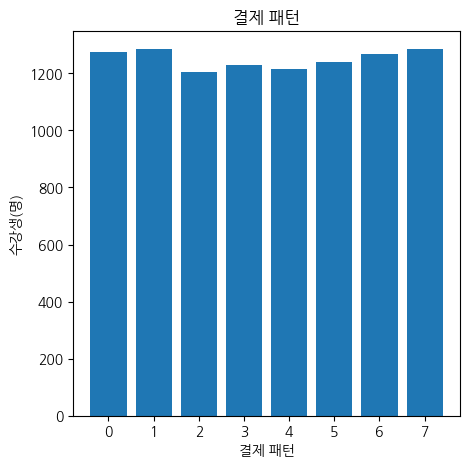

In [248]:
df2  = all_data.groupby('payment_pattern').count()

plt.figure(figsize=(5,5))
plt.bar(df2.index, df2['user_id'])

plt.title('결제 패턴')
plt.xlabel('결제 패턴')
plt.ylabel('수강생(명)')
plt.xticks()
plt.show()

## 가설과 검증

### 가설 1. 커뮤니티 활동이 높을수록 다음달 구독할 확률이 높지 않을까?

In [266]:
grouped = all_data.groupby(['community_engagement_level','target'])[['user_id']]
group = grouped.count()
group

user_id
community_engagement_level target         
1                          0           211
                           1           348
2                          0           468
                           1           751
3                          0           620
                           1           968
4                          0           805
                           1          1265
5                          0          1697
                           1          2867

In [274]:
community_pivot_table = pd.pivot_table(all_data, values='user_id',
                       index=['community_engagement_level'],
                       columns=['target'],  
                       aggfunc="count")
community_pivot_table

target,0,1
community_engagement_level,,
1,211,348
2,468,751
3,620,968
4,805,1265
5,1697,2867


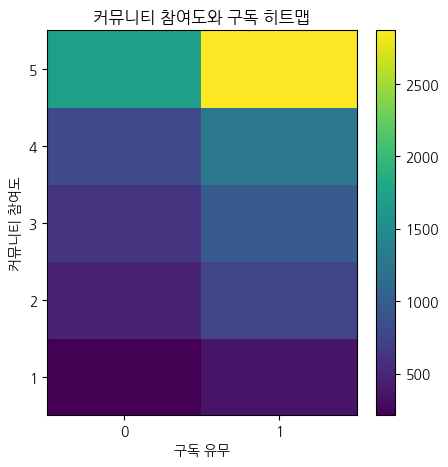

In [298]:
# 히트맵으로 나타내기
#그래프 사이즈 변경
plt.figure(figsize=(5,5))

plt.pcolor(community_pivot_table)

plt.xticks(np.arange(0.5, len(community_pivot_table.columns), 1), community_pivot_table.columns)
plt.yticks(np.arange(0.5, len(community_pivot_table.index), 1), community_pivot_table.index)

plt.title('커뮤니티 참여도와 구독 수')
plt.xlabel('구독 유무')
plt.ylabel('커뮤니티 참여도')

plt.colorbar()
plt.show()

!!!!!!!!!!  
커뮤니티 참여도가 높아질 수록 다음달에도 구속을 계속하는 경우가 많아지는 경향 발견  
  
?  
하지만 커뮤니티의 참여도가 높아지면서 구독을 안하는 경우도 많아짐.  
비율을 따져보자?

In [302]:
zeros = all_data['target'].value_counts()[0]
ones = all_data['target'].value_counts()[1]
counts = [zeros, ones]

community_pivot_table_part = pd.pivot_table(all_data, values='user_id',
                       index=['community_engagement_level'],
                       columns=['target'],  
                       aggfunc="count").div(counts)
community_pivot_table_part

target,0,1
community_engagement_level,,
1,0.055512,0.056138
2,0.123125,0.121149
3,0.163115,0.156154
4,0.211786,0.204065
5,0.446461,0.462494


In [303]:
community_pivot_table_total = pd.pivot_table(all_data, values='user_id',
                       index=['community_engagement_level'],
                       columns=['target'],  
                       aggfunc="count").div(len(all_data))
community_pivot_table_total

target,0,1
community_engagement_level,,
1,0.0211,0.0348
2,0.0468,0.0751
3,0.0620,0.0968
4,0.0805,0.1265
5,0.1697,0.2867


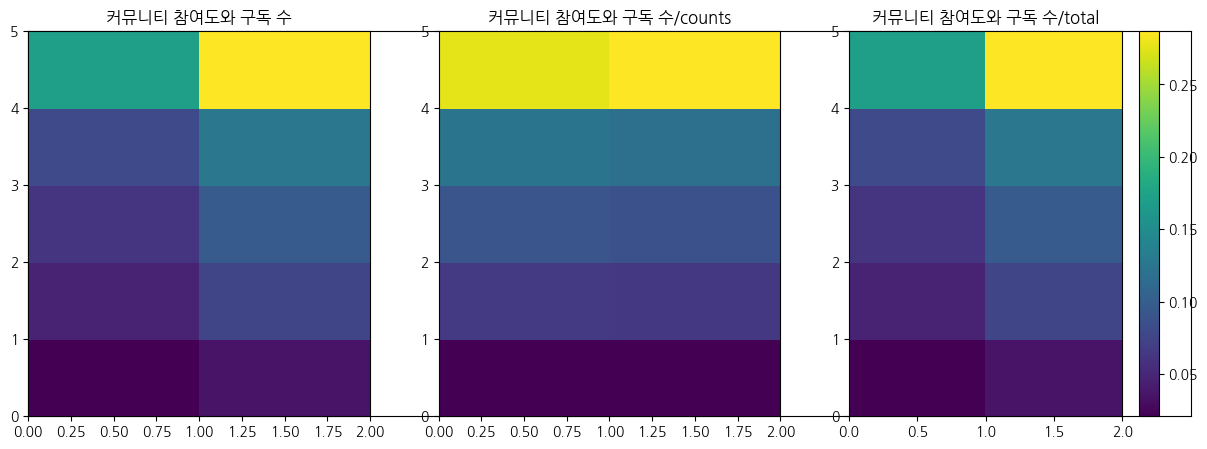

In [323]:
plt.figure(figsize=(15,5))
plt.tick_params(left = False, right = False , labelleft = False , 
                labelbottom = False, bottom = False) 
plt.subplot(1,3,1)
fig1 = plt.pcolor(community_pivot_table)
plt.title('커뮤니티 참여도와 구독 수')

plt.subplot(1,3,2)
fig2 = plt.pcolor(community_pivot_table_part)
plt.title('커뮤니티 참여도와 구독 수/counts')


plt.subplot(1,3,3)
fig3 = plt.pcolor(community_pivot_table_total)
plt.title('커뮤니티 참여도와 구독 수/total')

plt.colorbar()

* 커뮤니티의 참여도가 높아질수록 구독을 유지하는 경우가 높아짐
* 커뮤니티의 참여도가 높아질수록 구독을 안 하는 경우도 높아지긴 함
* 구독을 유지하는 경우가 좀 더 높은 수치로 유지되긴 함. 어느정도 상관은 있지만 무조건적인 관계라고는 볼 수 없을듯!

### 가설 2. 평균 시간에 맞춰 수강한 사람들은 다음달에 수강할 확률이 높을 것이다?!

* 평균 강의 54분, [1.5배속(약 37분), 0.8배속(약 69분)] 사이인 사람의 target 분포와 그 외인 사람의 target 분포?!

### 가설 3. Premium 구독자일수록 플랫폼에 더 만족한다는 뜻이 아닐까? 다음달 구독 확률이 높지 않을까?

### 가설 4. 구매 문의를 많이 한다는 것은 플랫폼에 관심이 많다는 것이니 구독 확률이 높지 않을까?

### 가설 5. 연속적으로 결제한 달이 있는 사람은 또 구독할 가능성이 높지 않을까?

### 가설 6. 두 달 이상 결제한 사람이 구독할 가능성이 높지 않을까?